In [1]:
import numpy as np
import pandas as pd 
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [2]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [3]:
A.sum()

19

In [4]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [5]:
#Boston?

In [6]:
X= pd.DataFrame({'intercept':np.ones(Boston.shape[0]),'lstat':Boston['lstat']}) # Adding the intercept column
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [7]:
Y=Boston['medv']
model=sm.OLS(Y,X) #Create an OLS Regression model 
results = model.fit()# Solves The OLS (Finds the most optimal coefficients) to minimize RSS
print(results.params)

intercept    34.553841
lstat        -0.950049
dtype: float64


In [8]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [9]:
design = MS(['lstat'])
design = design.fit(Boston) # fit the model 
X= design.transform(Boston) # Transforms the raw data into a design matrix 
X= design.fit_transform(Boston) # combine both methods
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           5.08e-88
Time:                        17:05:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [12]:
new_df = pd.DataFrame({'lstat':[5,10,15]}) #values we want to make prediction for 
new_predictor = design.transform(new_df)
new_predictor

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [13]:
new_prediction = results.get_prediction(new_predictor)
new_prediction.predicted_mean # gives the estimated mean  for each of the new predictors 

array([29.80359411, 25.05334734, 20.30310057])

In [14]:
new_prediction.conf_int(alpha=0.05) # Confidence interval with 95% confidence 
#each row is an interval for a value 

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [15]:
new_prediction.conf_int(obs=True , alpha =0.05) # obs= True will compute the prediction interval 
#As expected the prediction interval is wider than the confidence interval

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [16]:
def regression_line(ax,b,m, *args,**kwargs): # *args any number of non-named args while the **kwargs a allows any number of named args
    xlim=ax.get_xlim()
    print(xlim)
    ylim =[m*xlim[0]+b,m*xlim[1]+b]
    ax.plot(xlim,ylim,*args,**kwargs)

34.55384087938308
-0.9500493537579922
(-0.0820000000000003, 39.782)


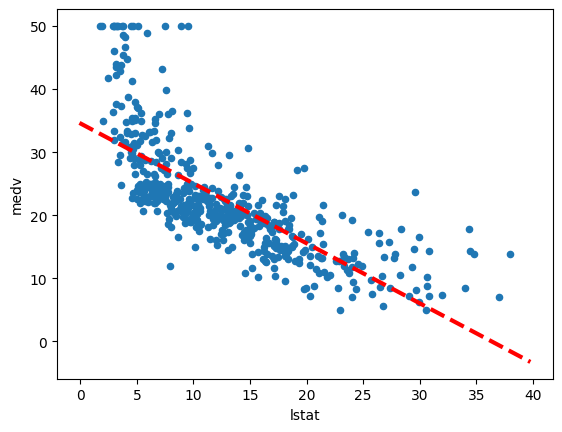

In [17]:
ax= Boston.plot.scatter('lstat','medv')
print(results.params['intercept'])
print(results.params['lstat'])
regression_line(ax,results.params['intercept'],results.params['lstat'],'r--',linewidth=3)
#Noitcing Some non-linearity

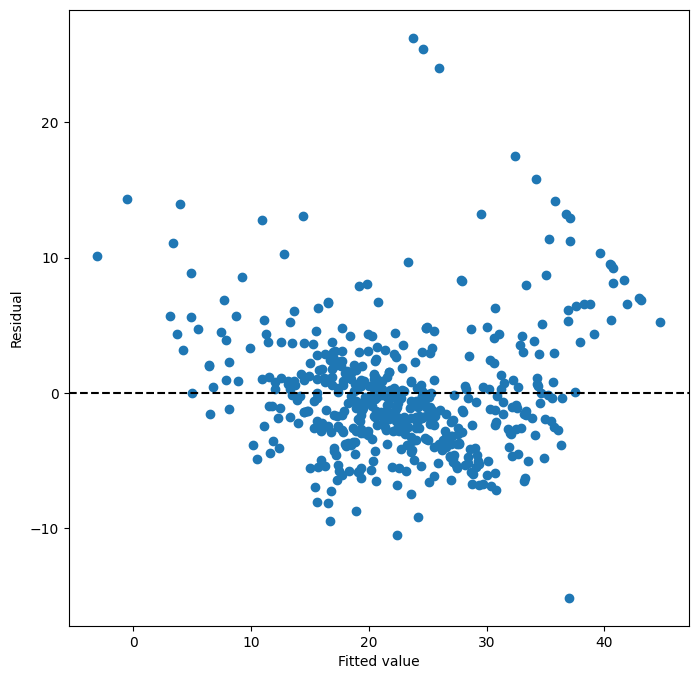

In [27]:
ax=subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel('Residual')
ax.axhline(0,c='k',ls='--'); # Adding horizontal line at 0 for reference 

506
374


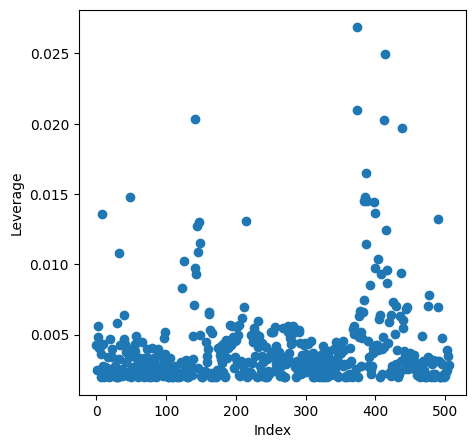

In [19]:
#Leverage statistics
infl=results.get_influence()

ax=subplots(figsize=(5,5))[1]
print(X.shape[0])
ax.scatter(np.arange(X.shape[0]),infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
value= np.argmax(infl.hat_matrix_diag)
print(value)

In [20]:
print(results.get_influence().hat_matrix_diag)


[0.00426252 0.00245553 0.00486368 0.00563978 0.00405871 0.00412751
 0.00197822 0.00361537 0.01356717 0.00274419 0.00433693 0.00199106
 0.00233916 0.00272569 0.00219866 0.00265576 0.00340847 0.00213425
 0.0020123  0.00204949 0.0046947  0.00203007 0.00340558 0.00400439
 0.00249275 0.00255394 0.00215694 0.00280761 0.00197712 0.00199388
 0.00581832 0.0019821  0.0107798  0.00323656 0.00427079 0.00231952
 0.00203629 0.00256179 0.00222348 0.00467273 0.00639974 0.00434671
 0.00379466 0.00303157 0.00235019 0.00220805 0.0020633  0.00344352
 0.014778   0.00246481 0.00200095 0.00237967 0.00408724 0.00266881
 0.00215527 0.00436495 0.00381598 0.0049175  0.00327945 0.00243395
 0.00198587 0.00210028 0.00333859 0.00236234 0.00279905 0.00445098
 0.00220239 0.00278127 0.0019837  0.00255578 0.0033432  0.00227489
 0.00395205 0.00299147 0.00331569 0.00251165 0.0019944  0.00219681
 0.00198009 0.0024665  0.00408152 0.00312252 0.0033432  0.00300342
 0.00233351 0.00343215 0.00197795 0.00266554 0.00396314 0.0038

## Muiltiple Regression

In [21]:
new_X= MS(['lstat','age']).fit_transform(Boston)
model1= sm.OLS(Y,new_X)
results1= model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [22]:
variables = Boston.columns.drop('medv')
variables

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [28]:
new_X= MS(variables).fit_transform(Boston) # Design matrix
new_X

,intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [24]:
model = sm.OLS(Y,new_X)
results =model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [25]:
variables_no_age = Boston.columns.drop(['medv','age'])
Xma= MS(variables_no_age).fit_transform(Boston)
model1= sm.OLS(Y,Xma)
results2 = model1.fit()

In [26]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


## Multivariate Goodness of Fit

In [41]:
print(new_X.shape)

(506, 13)


In [45]:
dir(results)
results.rsquared
new_X.shape[1]
X.shape[1]

2

In [46]:
vals = [VIF(new_X,i)
        for i in range (1,new_X.shape[1])]
variance_inflation_factor = pd.DataFrame({'variance_inflation_factor':vals},index=new_X.columns[1:])
variance_inflation_factor

,variance_inflation_factor
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [51]:
vals =[]
for i in range (1,new_X.shape[1]): # same as List Comprehension
    vals.append(VIF(new_X,i))

In [52]:
variance_inflation_factor = pd.DataFrame({'variance_inflation_factor':vals},index=new_X.columns[1:])
variance_inflation_factor

,variance_inflation_factor
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


## Interaction Terms

- Including interaction terms in a linear model helps to removes additive assumption in Linear Regression
- Combnining Predictors will increase the predictions


In [54]:
X_inter = MS(['lstat','age',('lstat','age')]).fit_transform(Boston)
X_inter

,intercept,lstat,age,lstat:age
0,1.0,4.98,65.2,324.696
1,1.0,9.14,78.9,721.146
2,1.0,4.03,61.1,246.233
3,1.0,2.94,45.8,134.652
4,1.0,5.33,54.2,288.886
...,...,...,...,...
501,1.0,9.67,69.1,668.197
502,1.0,9.08,76.7,696.436
503,1.0,5.64,91.0,513.240
504,1.0,6.48,89.3,578.664


In [55]:
model3= sm.OLS(Y,X_inter)
results3= model3.fit()

In [56]:
summarize(results3)

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


## Non-Linear Transformations of the Predictors

- Extending the linear regression model using **Polynomial Regression**

In [59]:
X_poly = MS([poly('lstat',degree=2),'age']).fit_transform(Boston)
X_poly

,intercept,"poly(lstat, degree=2)[0]","poly(lstat, degree=2)[1]",age
0,1.0,-0.047815,0.038955,65.2
1,1.0,-0.021892,-0.010782,78.9
2,1.0,-0.053734,0.053604,61.1
3,1.0,-0.060527,0.071920,45.8
4,1.0,-0.045634,0.033866,54.2
...,...,...,...,...
501,1.0,-0.018589,-0.015433,69.1
502,1.0,-0.022265,-0.010231,76.7
503,1.0,-0.043702,0.029497,91.0
504,1.0,-0.038467,0.018316,89.3


In [60]:
model4 = sm.OLS(Y,X_poly)
results4= model4.fit()

In [61]:
summarize(results4)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


- The zero p-value suggests that it leas to an improved model model

Using **anova_lm()** to quantify and compare the difference between the two models results 

In [64]:
anova_lm(results4,results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,14165.613251,0.0,NaN,NaN,NaN
1,494.0,11351.108037,8.0,2814.505214,15.310901,3.677919e-20


- **anova_lm()** performs a hypothesis test comparing the two models 
- The **Null hypothesis** -> that the the quadratic term in the `results4` model isnt needed
- The alternative hypothesis -> That the quadratic term is superior than the simple linear model
- The `NaN` means that there is no previous model to compare to
- **anova_lm()** can compare multiple models

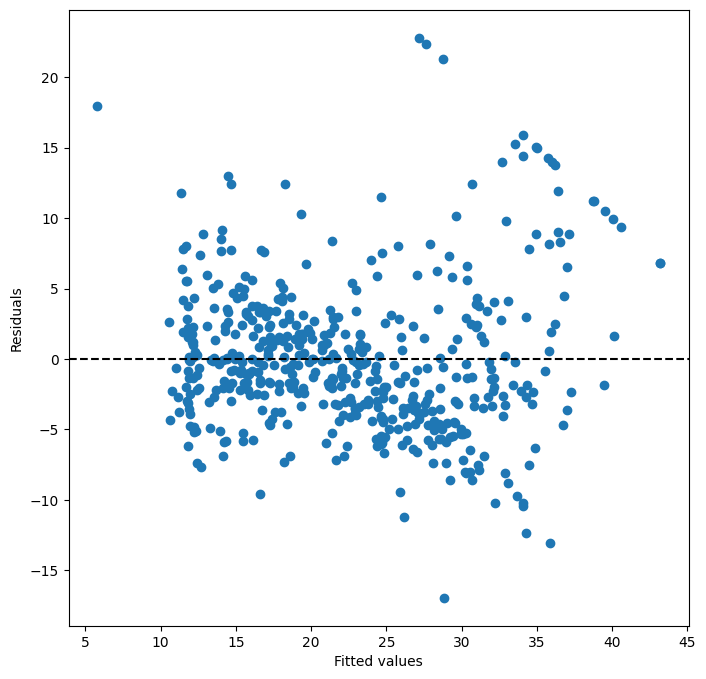

In [68]:
ax= subplots(figsize=(8,8))[1]
ax.scatter(results4.fittedvalues,results4.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(0,c='k',ls='--');

- Notice that using the **Polynomial Regression** Reduced The ther **Residuals** which increase the model accuracy 

## Qualitative PRedictors

In [72]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [74]:
all_variables = list (Carseats.columns.drop('Sales'))
Y= Carseats['Sales']
model_variables = all_variables+[('Income','Advertising'),('Price','Age')]

In [75]:
X = MS(model_variables).fit_transform(Carseats)
X

,intercept,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes],Income:Advertising,Price:Age
0,1.0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0,803.0,5040.0
1,1.0,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0,768.0,5395.0
2,1.0,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0,350.0,4720.0
3,1.0,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0,400.0,5335.0
4,1.0,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0,192.0,4864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0,1836.0,4224.0
396,1.0,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0,69.0,6600.0
397,1.0,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0,312.0,6360.0
398,1.0,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0,553.0,4750.0


- The `MS` Automatically transforms  qualitative features using **one-hot encoding**
- Each category gets a vector where one element is set to 1 and all others 0
- Example: Red(1,0,0) Blue(0,1,0) Green(0,0,1)

In [76]:
model = sm.OLS(Y,X)
results = model.fit()

In [77]:
summarize(results)

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


- The high  coefficients  for ShelveLoc[Good] indicates that's  a good  shelving effects the sales